In [1]:
import pandas as pd
import networkx as nx

In [2]:
user_party = pd.read_csv("user_party.csv")

In [3]:
def bipartite_graph(user_party, neutral = True):
    if not neutral:
        user_party = user_party[user_party.Party != 'Neutral']
    else:
        pass
    G = nx.from_pandas_edgelist(user_party, source="user.id", target="Party", edge_attr=True)
    labels = {"FDP": "FDP", "CDU/CSU": "CDU/CSU", "Grüne":"Grüne", "Linke":"Linke", "SPD":"SPD"}
    pos = nx.bipartite_layout(G, user_party.Party)
    nx.draw(G, pos=pos, with_labels=False, width=0.15, edge_color=["red", "green"])
    nx.draw_networkx_labels(G,{k:v+[0,-0.05] for k,v in pos.items()},labels,font_size=12,font_color='black')
    None

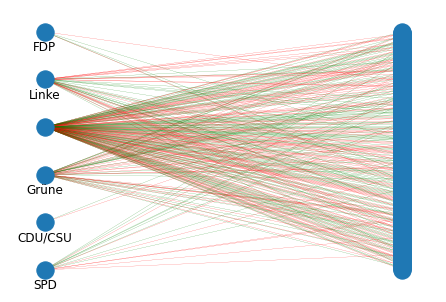

In [4]:
# Show matching with tweets without party reference included
bipartite_graph(user_party)

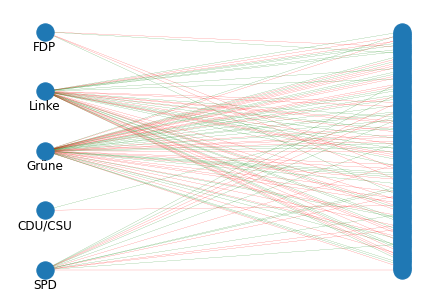

In [5]:
# Only show tweets with party reference
bipartite_graph(user_party, neutral=False)